In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_parquet("dataDumper.parquet")

In [33]:
df.columns

Index(['Time_utc', 'VehicleName', 'VehicleType', 'Pressure_Pa_1',
       'Pressure_Pa_2', 'Pressure_Pa_3', 'Pressure_Pa_4', 'Pressure_Pa_5',
       'Pressure_Pa_6', 'Temperature_K_1', 'Temperature_K_2',
       'Temperature_K_3', 'Temperature_K_4', 'Temperature_K_5',
       'Temperature_K_6', 'ColdPressure_Pa_1', 'ColdPressure_Pa_2',
       'ColdPressure_Pa_3', 'ColdPressure_Pa_4', 'ColdPressure_Pa_5',
       'ColdPressure_Pa_6', 'Latitude_dd', 'Longitude_dd', 'Altitude_m',
       'Speed_mps', 'epsilonX', 'epsilonY', 'epsilonZ', 'epsilonSpeed',
       'AtmosphericPressure_Pa', 'dt_s', 'dd_m', 'RatioPayload'],
      dtype='object')

In [34]:
df["VehicleName"].unique() # only 1 vehicle

array(['C-132'], dtype=object)

In [35]:
corr_mat = df[df.columns[3:]].corr()

In [36]:
# see if corr is significant
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i, j]) > 0.8:  # threshold for significance
            print(f"Correlation: {corr_mat.columns[i]} / {corr_mat.columns[j]}: {corr_mat.iloc[i, j].round(2)}")

Correlation: Pressure_Pa_3 / Pressure_Pa_2: 0.95
Correlation: Pressure_Pa_5 / Pressure_Pa_2: 0.93
Correlation: Pressure_Pa_5 / Pressure_Pa_3: 0.99
Correlation: Temperature_K_1 / Pressure_Pa_2: 0.98
Correlation: Temperature_K_1 / Pressure_Pa_3: 0.95
Correlation: Temperature_K_1 / Pressure_Pa_5: 0.93
Correlation: Temperature_K_2 / Pressure_Pa_2: 0.98
Correlation: Temperature_K_2 / Pressure_Pa_3: 0.95
Correlation: Temperature_K_2 / Pressure_Pa_4: 0.81
Correlation: Temperature_K_2 / Pressure_Pa_5: 0.95
Correlation: Temperature_K_2 / Temperature_K_1: 0.97
Correlation: Temperature_K_3 / Pressure_Pa_2: 0.95
Correlation: Temperature_K_3 / Pressure_Pa_3: 0.97
Correlation: Temperature_K_3 / Pressure_Pa_5: 0.96
Correlation: Temperature_K_3 / Temperature_K_1: 0.96
Correlation: Temperature_K_3 / Temperature_K_2: 0.97
Correlation: Temperature_K_4 / Pressure_Pa_2: 0.95
Correlation: Temperature_K_4 / Pressure_Pa_3: 0.97
Correlation: Temperature_K_4 / Pressure_Pa_5: 0.97
Correlation: Temperature_K_4 / 

In [37]:
# Create Segments based on  RatioPayLoad
df[['phaseNb']] = df[['RatioPayload']].diff().abs().cumsum()

In [38]:
#Split the data into loaded trajectories and empty trajectories
segment_list = [data_phase for _, data_phase in df.groupby('phaseNb')]
empty_segment_list = []
load_segment_list = []

for segment in segment_list:
    if segment.RatioPayload.mean() == 0.0:
        empty_segment_list.append(segment)
    elif segment.RatioPayload.mean() == 1.0:
        load_segment_list.append(segment)

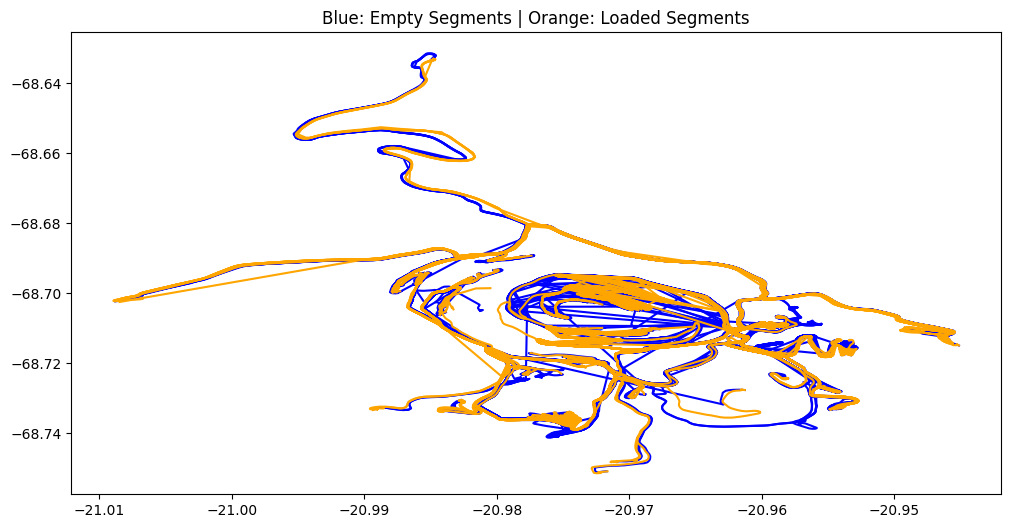

In [39]:
# Plot the trajectories
plt.figure(figsize=(12, 6))

for s in empty_segment_list:
    plt.plot(s['Latitude_dd'], s['Longitude_dd'], color='blue')
for s in load_segment_list:
    plt.plot(s['Latitude_dd'], s['Longitude_dd'], color='orange')

plt.title("Blue: Empty Segments | Orange: Loaded Segments")
plt.show()

In [40]:
df["Time_utc"].head()

0    2023-01-01 00:00:00.328
1    2023-01-01 00:00:05.338
2    2023-01-01 00:00:10.331
3    2023-01-01 00:00:15.325
4    2023-01-01 00:00:20.448
Name: Time_utc, dtype: object

In [41]:
df["Time_utc"] = pd.to_datetime(df["Time_utc"], format="ISO8601")

In [42]:
# create a 10ms datetime
eps = pd.Timedelta(seconds=1)
frequency = pd.Timedelta(seconds=5)

In [43]:
df["Time_utc"]
missing = []

# verify missing ts
for i in range(len(df["Time_utc"])):
    if pd.isnull(df["Time_utc"][i]):
        print("Missing timestamp found")
    elif i > 0 and abs(df["Time_utc"][i] - df["Time_utc"][i-1])-frequency > eps:
        print(f"Gap: {i-1} and {i}")
        print(f"Gap size: {abs(df['Time_utc'][i] - df['Time_utc'][i-1])}")
        missing.append((i-1))

Gap: 7 and 8
Gap size: 0 days 00:00:25.098000
Gap: 21 and 22
Gap size: 0 days 00:00:15.122000
Gap: 137 and 138
Gap size: 0 days 00:00:09.958000
Gap: 268 and 269
Gap size: 0 days 00:00:09.947000
Gap: 678 and 679
Gap size: 0 days 00:00:10.059000
Gap: 717 and 718
Gap size: 0 days 00:00:14.890000
Gap: 721 and 722
Gap size: 0 days 00:00:09.979000
Gap: 725 and 726
Gap size: 0 days 00:00:09.950000
Gap: 726 and 727
Gap size: 0 days 00:00:15.114000
Gap: 727 and 728
Gap size: 0 days 00:00:14.891000
Gap: 728 and 729
Gap size: 0 days 00:00:20.027000
Gap: 1423 and 1424
Gap size: 0 days 00:00:10.066000
Gap: 1435 and 1436
Gap size: 0 days 00:00:09.918000
Gap: 1486 and 1487
Gap size: 0 days 00:00:06.019000
Gap: 1526 and 1527
Gap size: 0 days 00:00:09.941000
Gap: 1530 and 1531
Gap size: 0 days 00:00:20.017000
Gap: 1607 and 1608
Gap size: 0 days 00:00:09.991000
Gap: 1984 and 1985
Gap size: 0 days 00:00:12.565000
Gap: 2042 and 2043
Gap size: 0 days 00:00:06.974000
Gap: 2043 and 2044
Gap size: 0 days 00:0

In [44]:
round(len(missing) / df.shape[0], 5)

0.01999

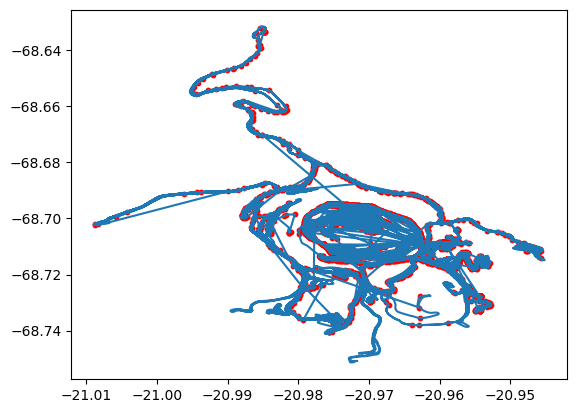

In [ ]:
plt.plot(df["Latitude_dd"], df["Longitude_dd"])
# if point is missing plot in red
for i in missing:
    plt.scatter(df["Latitude_dd"][i], df["Longitude_dd"][i], s=10, color='red', label='Missing') # change drawing order